In [1]:
using Pkg
#Pkg.add("Distributions")
#Pkg.add("Optim")
#Pkg.add("StatsPlots")
#Pkg.add("BlackBoxOptim")
#Pkg.add("ForwardDiff")
Pkg.add("StatsBase")
using Distributions,ForwardDiff, Optim

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [2]:
F = TruncatedNormal(.5,.4,0,1)

Truncated(Normal{Float64}(μ=0.5, σ=0.4), range=(0.0, 1.0))

In [3]:
cdf(F,.9)

0.9327939015561474

In [4]:
using StatsPlots


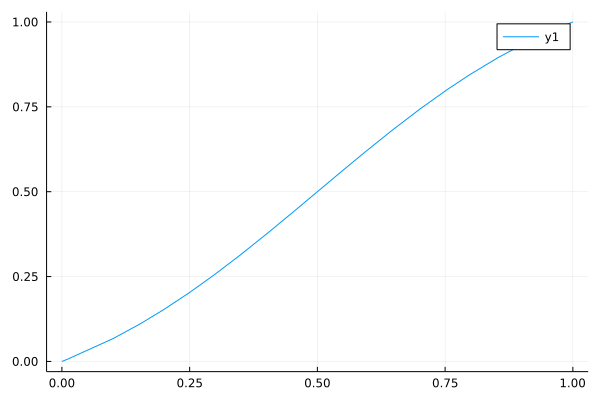

In [5]:
plot(x -> cdf(F,x),0,1)

In [6]:
data = [.1,.15,.21,.22,.25,.25,.26,.33,.35,.44,.51,.6,.65]

13-element Vector{Float64}:
 0.1
 0.15
 0.21
 0.22
 0.25
 0.25
 0.26
 0.33
 0.35
 0.44
 0.51
 0.6
 0.65

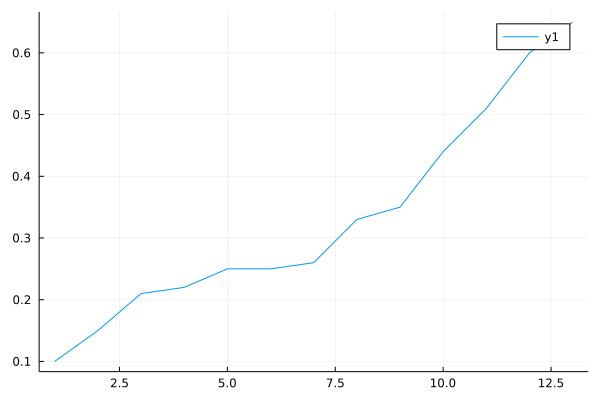

In [7]:
x = 1:13
p = plot(x, data)
#y = rand(10);
#typeof(data)
p

In [8]:
function l(params,x)
    F = TruncatedNormal(params[1],params[2],0,1)
    #print(typeof(F))
    p=0
    for y in x
        #print(y)
        #print(" ")
        #print(pdf(F,y))
        p = p+log(pdf(F,y))
    end
    return -p
end

l (generic function with 1 method)

In [9]:
show(l([.3,.2],data))

-5.338597935633495

In [10]:
res = optimize(params -> l(params, data), [0.5, 0.2])


 * Status: success

 * Candidate solution
    Final objective value:     -5.423482e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    36
    f(x) calls:    70


In [11]:
pair = Optim.minimizer(res)

2-element Vector{Float64}:
 0.31677705493244657
 0.17918637617910327

In [12]:
best = TruncatedNormal(pair[1],pair[2],0,1)

Truncated(Normal{Float64}(μ=0.31677705493244657, σ=0.17918637617910327), range=(0.0, 1.0))

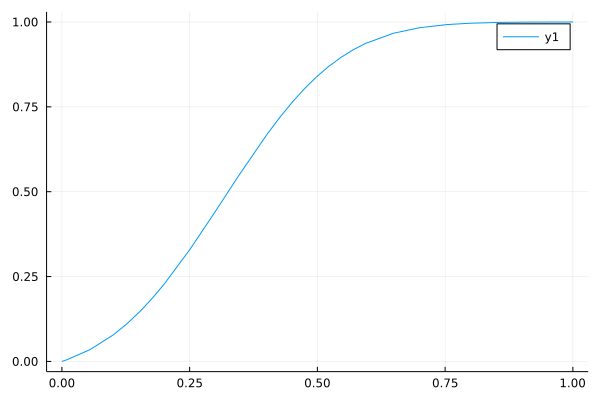

In [13]:
plot(x -> cdf(best,x),0,1)

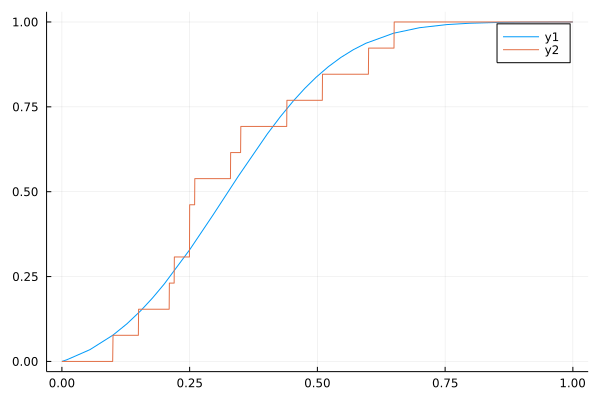

In [14]:
using StatsBase
gcdf=ecdf(data)
plot!(x -> gcdf(x),0,1)